In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")


Importing the dataset

In [180]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [181]:
df.shape

(381109, 12)

In [182]:
#checking of null values
df.isnull().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [184]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [185]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

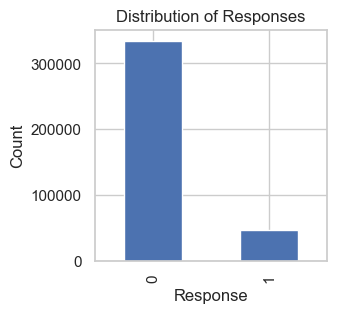

In [186]:

value_counts=df['Response'].value_counts()
plt.figure(figsize=(3,3))

value_counts.plot(kind='bar')

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

plt.show()

<Axes: >

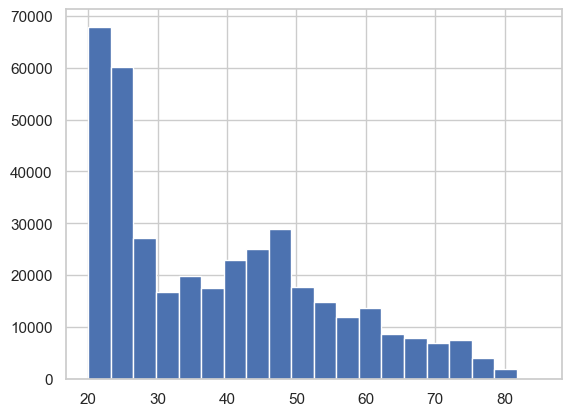

In [187]:
# checking distribution for age col
df['Age'].hist(bins=20)

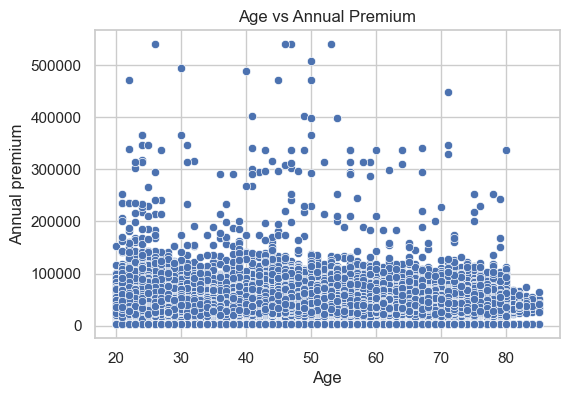

In [188]:
# Scatter Plot

plt.figure(figsize =(6,4))
sns.scatterplot(x='Age',y='Annual_Premium',data=df)
plt.title('Age vs Annual Premium')

plt.xlabel("Age")
plt.ylabel("Annual premium")
plt.show()

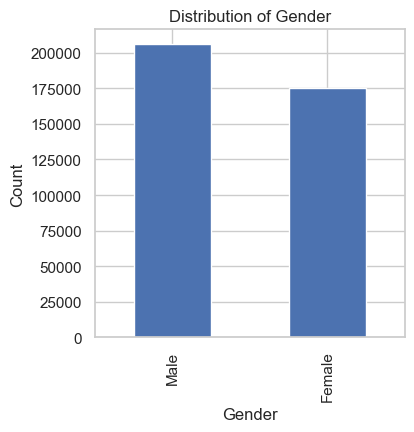

In [189]:
value_counts=df['Gender'].value_counts()
plt.figure(figsize=(4,4))

#create the bar plot
value_counts.plot(kind='bar')

#customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Distribution of Gender")

#show the plot
plt.show()


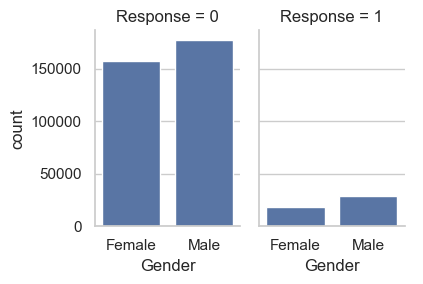

In [190]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x='Gender',y='count',col='Response',data = data,kind='bar',height=3,aspect=.7)


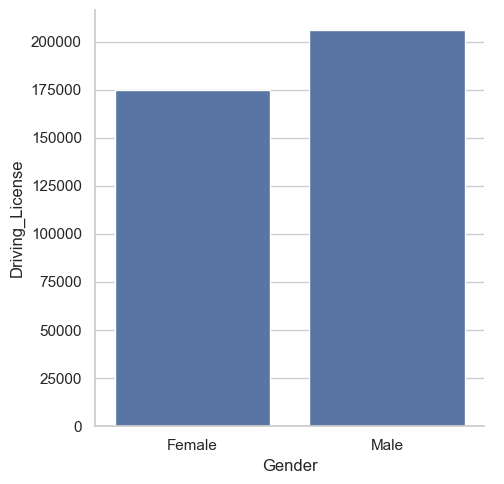

In [191]:
# driving license by gender
data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar")

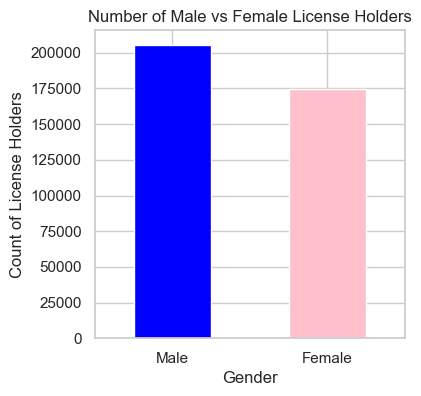

In [192]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

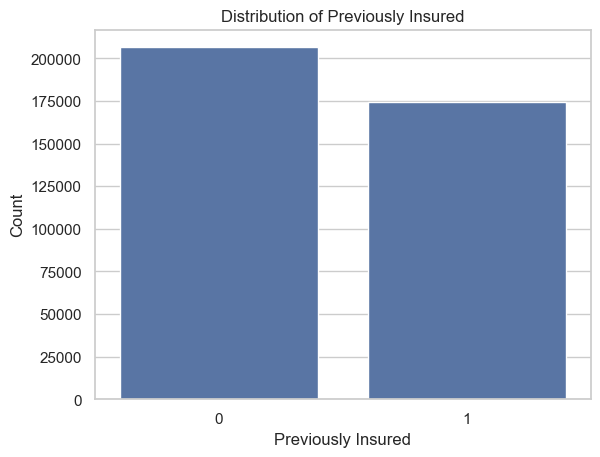

In [193]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

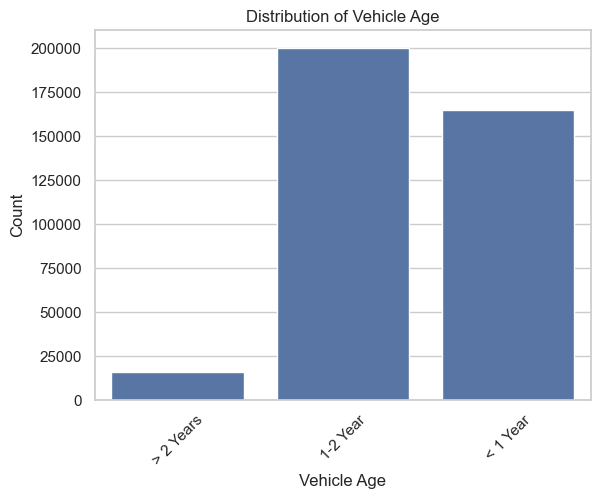

In [194]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [195]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


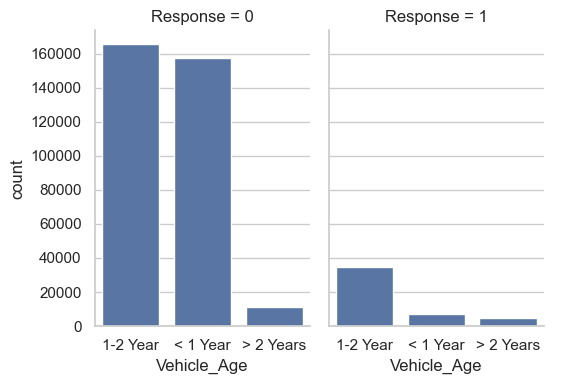

In [196]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

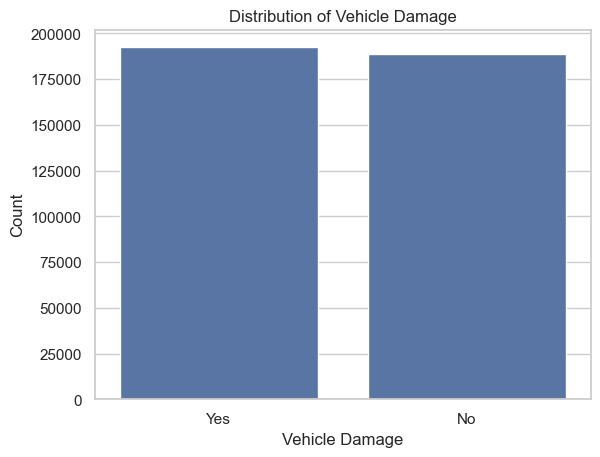

In [197]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

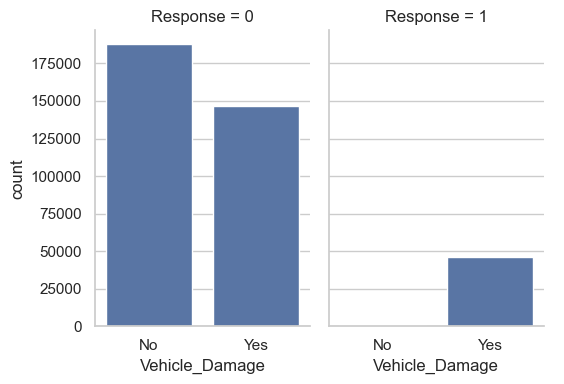

In [198]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [199]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

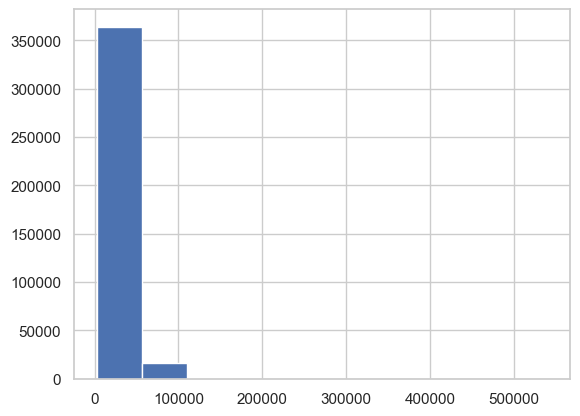

In [200]:
df['Annual_Premium'].hist(bins=10)


DATA PREPROCESSING

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [202]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [203]:
#mapping Gender col to (0 and 1)values
df['Gender'] = df['Gender'].map({'Female':0 ,'Male':1}).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [204]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [205]:
#creating dummy cols for cateforical features
df = pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [206]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [207]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')


    

In [208]:
#Scaling the data

from sklearn.preprocessing import LabelEncoder ,StandardScaler,MinMaxScaler,RobustScaler

ss=StandardScaler()
df[num_feat]= ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

id=df.id
df=df.drop('id',axis=1)

In [209]:
#train_test_split

from sklearn.model_selection import train_test_split

train_target = df['Response']
train = df.drop(['Response'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(train,train_target,random_state=0)

In [210]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [211]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


MODEL TRAINER - RANDOM FOREST CLASSIFIER

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion' : ['entropy','gini'],
                 'max_depth' : [2,3,4,5,6,7,10],
                 'min_samples_leaf':[4,6,8],
                 'min_samples_split':[5,7,10],
                 'n_estimators':[300]}
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf,param_distributions=random_search,n_iter=10,cv=4,verbose=1,random_state=101,n_jobs=-1)

model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [213]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'gini'}


SAVE THE MODEL

In [217]:
import pickle

filename='rf_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model, f)
print(f"Model saved successfully to {filename}")

Model saved successfully to rf_model.pkl


MOdel evaluation

In [216]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

